In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [6]:
#import stephane.display.graphes as graphes
#import stephane.tools.Smath as smath

import icewave.display.graphes as graphes
import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rwphone
import icewave.tools.rw_data as rw

import icewave.field.multi_instruments as multi

import phonefleet.connect as connect

In [40]:

base = '/Volumes/Fabien_2024/Telephones/Tsync/'
acq = 'accelerometer2025-09-17_11-35-27/'

folder = base + acq#f'/Data/{date}/Phone/{phone}/'

savefolder = base+'PhaseLocker/'#'/home/turbots/Documents/Telephones/Fleet_Documentation/Results/'
filelist = glob.glob(folder+'*')
pprint(filelist)

['/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_11-35-27/P32_D-2025-09-17T17_27_00-android.sensor.accelerometer-1-6571572901858--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_11-35-27/P33_D-2025-09-17T17_27_00-android.sensor.accelerometer-1-3168433771--1.csv']


In [8]:
datas = {}

for filename in filelist:
    key = int(filename.split('/')[-1][1:3])
    print(key)
    raw = rw.read_csv(filename,delimiter=',')
    data = {}
    t = np.asarray(raw)[:,0].astype(int)
    t = t/10**6
    indices = t>0
    print(np.sum(indices))
    data['t'] = t[indices]
    data['ax'] = np.asarray(raw)[indices,1].astype(float)
    data['ay'] = np.asarray(raw)[indices,2].astype(float)
    data['az'] = np.asarray(raw)[indices,3].astype(float)
    
    datas[key] = data

32
47674
33
47780


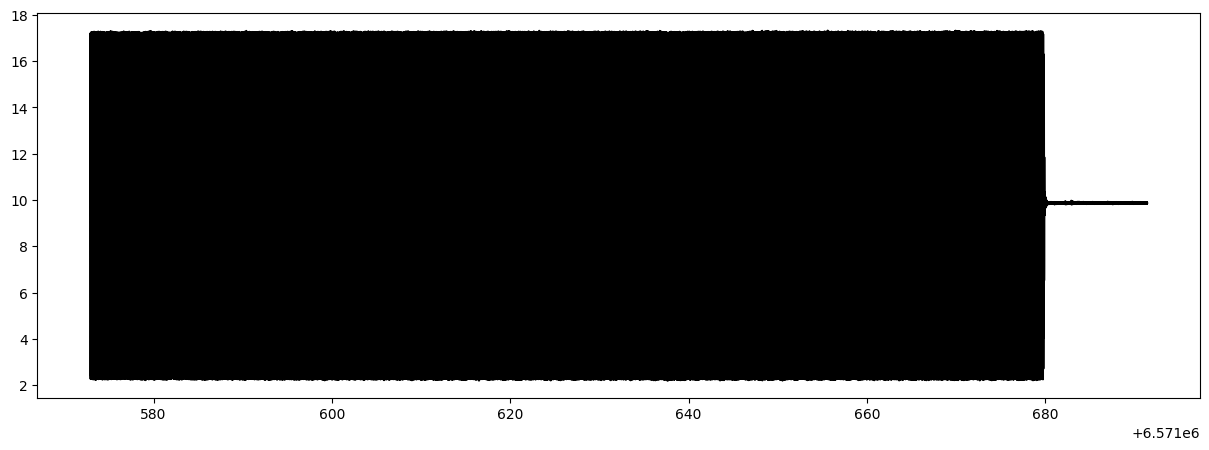

In [11]:
fig, ax = plt.subplots(figsize = (15,5))

phone = 32
t = datas[phone]['t']
az = datas[phone]['az']
ax.plot(t,az,'k')
#ax.set_xlim(31.5,32.5)

In [ ]:
for phone in resuls.keys():
    datas[phone]['']

In [73]:
timefolder = base+'Tsync/'
filename = timefolder +'tsync_1758122948.txt'

synctable = rw.read_csv(filename,delimiter=',')
synctable = rw.csv2dict(synctable)

#print(synctable)
timetable = {}
phonelist = []
#t0 = synctable['0_0']['t0']
for key in synctable.keys():
    timetable[int(key)]=synctable[key]['tlag']
    
pprint(timetable)

{32: 1751551248.339126, 33: 1758119653.2279196}


In [102]:
1751551248/55/365/24/3600

1.009842285872423

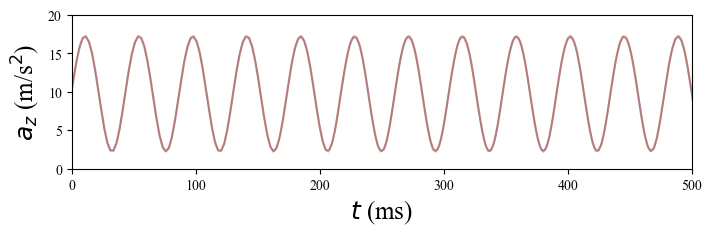

In [22]:
fig, ax = plt.subplots(figsize = (8,2))

phoneref = 32
t0 = datas[phoneref]['t'][0]+timetable[phoneref]
for phone in datas.keys():
    shift = (phone-phoneref)*3
    t = datas[phone]['t']
    az = datas[phone]['az']

    tr = t+timetable[phone]-t0
    if phone == 32:
        color='r'
    else:
        color='k'
        
    datas[phone]['tinfo']=tr#synchonise time stamps using the mechanical method t=0 corresponds the first data point of #10 phone 

    ax.plot((tr-10)*10**3,az,color,alpha=0.3)
    
#    ax.plot(0,valmax+shift,'kx')
    #ax.set_xlim(33.1,33.2)
    #tt = 48.73
    ax.set_ylim([0,20])
    #ax.set_xlim(48.7,48.85)
    #ax.text(tt,,phone,color=color)
    
    #ax.set_xlim(2,105)

    ax.set_xlim([0,500])
    
figs = graphes.legende('$t$ (ms)','$a_z$ (m/s$^2$)','')
graphes.save_figs(figs,savedir=savefolder)

100.53995555991175


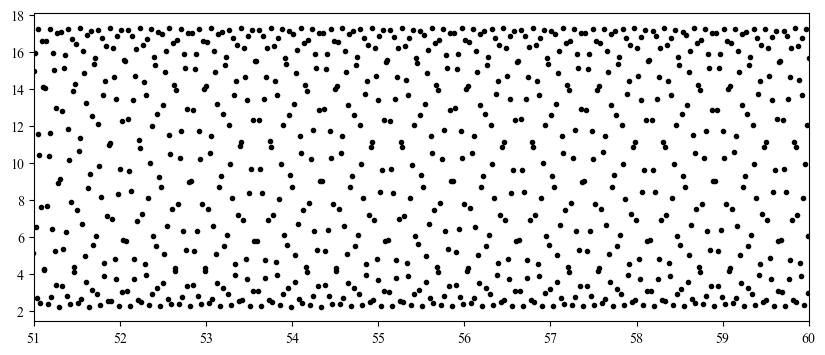

In [105]:
fig, ax = plt.subplots(figsize = (10,4))

t = datas[32]['tinfo'][0:-1:4]
y1 = datas[32]['az'][0:-1:4]
ax.plot(t,y1,'k.')
ax.set_xlim(51,60)

print(1/np.mean(np.diff(t)))

In [74]:
import scipy.interpolate as interp

tmin = 2
tmax = 105

dt = 1/400
ti = np.arange(tmin,tmax,dt)
print(len(ti))

for phone in datas.keys():
    t = datas[phone]['tinfo']
    y = datas[phone]['az']
    fi = interp.interp1d(t,y,kind='linear')
    datas[phone]['fi']=fi
    datas[phone]['azi']=fi(ti)

41200


403.58000337026135


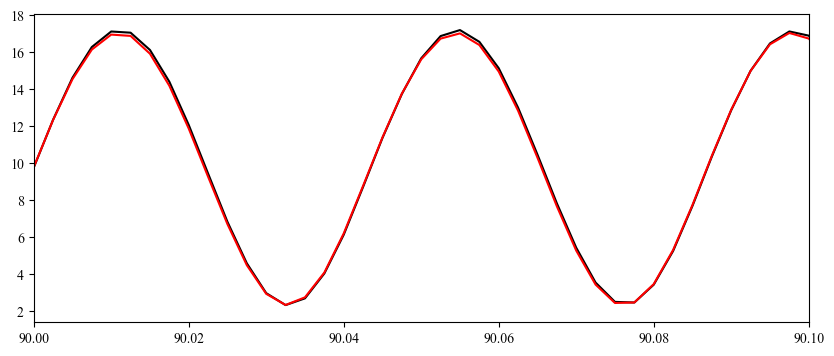

In [24]:
fig, ax = plt.subplots(figsize = (10,4))

#t = datas[32]['ti']
y1 = datas[32]['azi']
y2 = datas[33]['azi']

ax.plot(ti,y1,'k')
ax.plot(ti,y2,'r')

ax.set_xlim(90,90.1)

print(1/np.mean(np.diff(t)))

(-0.02, 0.02)

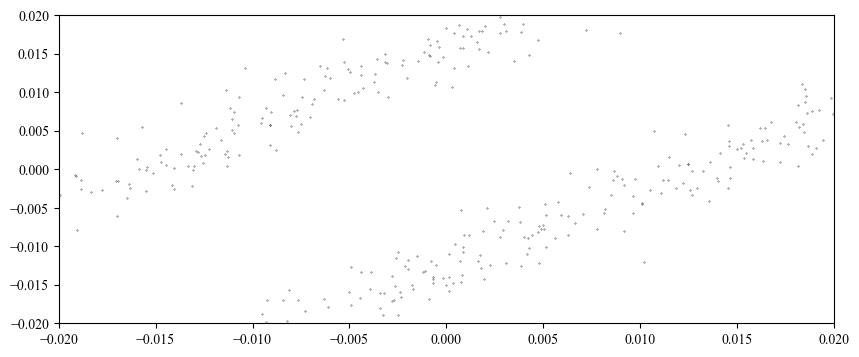

In [120]:
fig, ax = plt.subplots(figsize = (10,4))

y1 = datas[32]['azi']
y2 = datas[33]['azi']

y1 = y1-np.mean(y1)
y2 = y2-np.mean(y2)

y1 = y1/np.max(y2)
y2 = y2/np.max(y2)

ax.plot(y1,y2,'k.',markersize=0.5,alpha=1)

ax.set_xlim(-0.02,0.02)
ax.set_ylim(-0.02,0.02)

#np.polyfit()

In [65]:
timefolder = base+'Tsync/'


syncfiles = glob.glob(timefolder+'tsync*.txt')
filename = syncfiles[-1]

#pprint(syncfiles)

times = []
timetable = {}
timetable[32]=[]
timetable[33]=[]

for filename in syncfiles:
    time = int(filename.split('tsync_')[1].split('.txt')[0])
    if time>=1758122946 and time<=1758122958:
    #print(time)
        times.append(time)
        synctable = rw.read_csv(filename,delimiter=',')
        synctable = rw.csv2dict(synctable)
    #t0 = synctable['0_0']['t0']

        for key in synctable.keys():
            timetable[int(key)].append(synctable[key]['tlag'])

print(len(timetable[32]))
print(np.std(timetable[32])*1000)
print(np.std(timetable[33])*1000)

timetable_avg={}
for phone in [32,33]:
    timetable_avg[phone]=float(np.mean(timetable[phone]))
    
print(timetable_avg)

5
0.6536947366944699
0.5472975315733738
{32: 1751551248.3394752, 33: 1758119653.22831}


In [71]:
phi

0.016345860671652727

In [76]:
t0 = datas[phoneref]['t'][0]+timetable_avg[phoneref]
for phone in datas.keys():
    t = datas[phone]['t']
    tr = t+timetable_avg[phone]-t0        
    datas[phone]['tinfo']=tr

In [77]:
import scipy.interpolate as interp

tmin = 2
tmax = 105

dt = 1/400
ti = np.arange(tmin,tmax,dt)
print(len(ti))

for phone in datas.keys():
    t = datas[phone]['tinfo']
    y = datas[phone]['az']
    fi = interp.interp1d(t,y,kind='linear')
    datas[phone]['fi']=fi
    datas[phone]['azi']=fi(ti)

41200


In [67]:
0.013/2/np.pi*1/23*1000

0.089957141747593

403.58000337026135


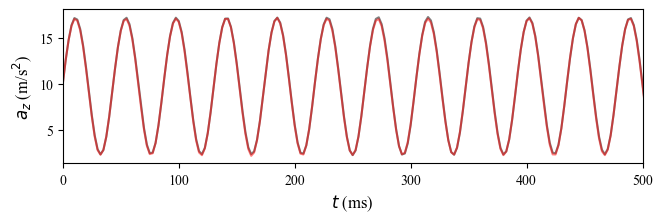

In [68]:
fig, ax = plt.subplots(figsize = (7.48,2))#double width

#t = datas[32]['ti']
y1 = datas[32]['azi']
y2 = datas[33]['azi']

ax.plot((ti-10)*1000,y1,'k',alpha=0.5)
ax.plot((ti-10)*1000,y2,'r',alpha=0.5)


print(1/np.mean(np.diff(t)))

ax.set_xlim([0,500])
    
figs = graphes.legende('$t$ (ms)','$a_z$ (m/s$^2$)','')
graphes.save_figs(figs,savedir=savefolder,prefix='interpolated_',overwrite=True)

In [78]:
y1 = datas[32]['azi']
y2 = datas[33]['azi']

y1 = y1-np.mean(y1)
y2 = y2-np.mean(y2)

y1 = y1/np.std(y1)/np.sqrt(2)
y2 = y2/np.std(y2)/np.sqrt(2)

phi = np.arccos(np.mean(y1*y2)*2)

In [95]:
T = 1/23
print(phi/2/np.pi*1/23*1000)
Dt = phi/2/np.pi*1/23*1000

0.07930594533182915


0.011460760861061537


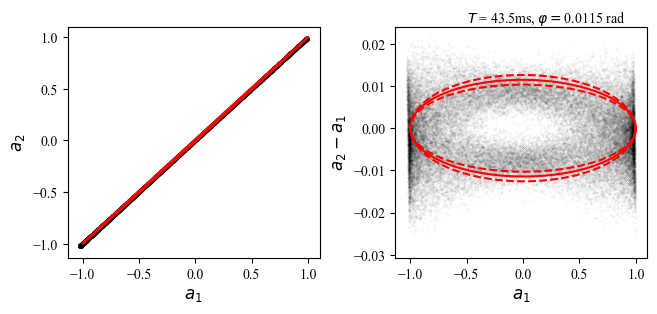

In [82]:
fig, axs = plt.subplots(figsize = (7.48,3),ncols=2)


print(phi)

theta = np.linspace(0,2*np.pi,1000)

ax = axs[0]
R0 = 1
ax.plot(y1,y2,'k.',markersize=0.5,alpha=1)
ax.plot(R0*np.cos(theta),R0*np.cos(theta+phi),'r-')

ax = axs[1]
ax.plot(y1,y2-y1-0.001,'k.',markersize=0.5,alpha=0.1)
ax.plot(R0*np.cos(theta),R0*np.cos(theta+phi)-R0*np.cos(theta),'r-')
ax.plot(R0*np.cos(theta),R0*np.cos(theta+phi*1.1)-R0*np.cos(theta),'r--')
ax.plot(R0*np.cos(theta),R0*np.cos(theta+phi*0.9)-R0*np.cos(theta),'r--')

plt.text(-0.5,0.025,r'$T$ = '+str(np.round(float(1/23)*1000,decimals=1))+r'ms, $\varphi = $'+str(np.round(phi,decimals=4))+' rad')
figs = graphes.legende('$a_1$','$a_2$','',ax=axs[0])
figs = graphes.legende('$a_1$','$a_2-a_1$','',ax=axs[1])
#ax.set_xlim(-0.02,0.02)
#ax.set_ylim(-0.02,0.02)

fig.subplots_adjust(wspace=0.3)

#np.polyfit()
#graphes.save_figs(figs,savedir=savefolder,overwrite=True)

47.58356719909749
67.41005353205477
0.011460760861061537


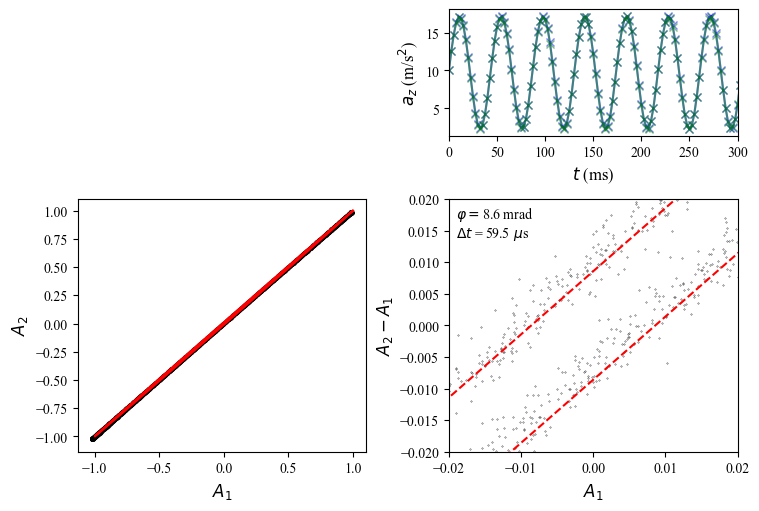

In [129]:
fig = plt.figure(figsize=(7.48,5), layout="constrained")

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1:,0])
ax3 = fig.add_subplot(gs[1:,1])

y1r = datas[32]['azi']
y2r = datas[33]['azi']

ax1.plot((ti-10)*1000,y1r,'bx-',alpha=0.5)
ax1.plot((ti-10)*1000,y2r,'gx-',alpha=0.5)
ax1.set_xlim([0,300])
figs = graphes.legende('$t$ (ms)','$a_z$ (m/s$^2$)','',ax=ax1)

R0 = 1#0.85
ax2.plot(y1,y2,'k.',markersize=0.5,alpha=1)
ax2.plot(R0*np.cos(theta),R0*np.cos(theta+phi),'r-')

ax3.plot(y1,y2,'k.',markersize=0.5,alpha=1)
ax3.set_xlim([-0.02,0.02])
ax3.set_ylim([-0.02,0.02])

tth1 = np.linspace(0,np.pi,1000)
tth2 = np.linspace(np.pi,2*np.pi,1000)

#ax3.plot(0,0,'kx')#,markersize=0.5,alpha=1)

ax3.plot(R0*np.cos(tth1),R0*np.cos(tth1+phi*0.75),'r--')
ax3.plot(R0*np.cos(tth2),R0*np.cos(tth2+phi*0.75),'r--')
#ax3.plot(R0*np.cos(tth1),R0*np.cos(tth1+phi*0.65),'r-')
#ax3.plot(R0*np.cos(tth2),R0*np.cos(tth2+phi*0.65),'r-')

print(Dt*0.6*1000)
print(Dt*0.85*1000)

#ax3.plot(R0*np.cos(theta),R0*np.cos(theta+phi*0.8),'r-')
#ax3.plot(R0*np.cos(theta),R0*np.cos(theta+phi)-R0*np.cos(theta),'r-')

text = r'$\varphi = $'+str(np.round(phi*0.75*1000,decimals=2))+r' mrad'
text2 = r'$\Delta t$ = '+str(np.round(0.75*Dt*1000,decimals=1))+r'$~\mu$s'

ax3.text(-0.019,0.017,text)
ax3.text(-0.019,0.014,text2)

figs = graphes.legende('$A_1$','$A_2$','',ax=ax2)
figs = graphes.legende('$A_1$','$A_2-A_1$','',ax=ax3)
#fig.subplots_adjust(wspace=0.3)

print(phi)
#ax.set_xlim(-0.02,0.02)
#ax.set_ylim(-0.02,0.02)
graphes.save_figs(figs,savedir=savefolder,prefix='Phaselocker_article_',overwrite=True)

In [86]:
np.cos(phi)

0.9999343261990967

In [87]:
np.max(y2)

0.9985073366967998

In [88]:
Dt = (phi*1/23/2/np.pi)*1000000
print(Dt)

79.30594533182915


In [26]:
M.shape
n0 = 32
nphone = 22
Mtab = np.reshape(M,(nphone,n0,int(nt/n0)))

In [27]:
Mtab.shape

(22, 32, 21875)

[[1.3607 0.9426 0.6781 0.4012 0.3746 0.4298 1.9622 1.7796 1.7977 1.4418
  1.4626 1.6692 1.6999 1.7228 0.031  0.5347 0.9792 0.7321 0.5097 0.1783
  1.9954 1.8698 1.7021 1.4798 1.4632 1.3822 1.3483 1.2351 0.9607 0.7482
  0.7241 0.871 ]
 [1.3595 0.9175 0.677  0.4017 0.3749 0.4303 1.9627 1.7793 1.7973 1.4423
  1.4629 1.6676 1.7005 1.7211 0.1005 0.5339 0.9797 0.7243 0.5087 0.1787
  0.0175 1.8703 1.6943 1.4786 1.4642 1.3828 1.3387 1.2349 0.9594 0.7386
  0.7243 0.8718]
 [1.3601 0.9168 0.678  0.4019 0.3728 0.4287 1.9617 1.7804 1.7986 1.4402
  1.461  1.6689 1.6997 1.7206 0.0496 0.532  0.9795 0.7232 0.5094 0.1783
  0.0169 1.8694 1.6931 1.4792 1.4624 1.3808 1.3391 1.2351 0.959  0.7376
  0.7234 0.8716]
 [1.3585 0.9273 0.6879 0.4013 0.3733 0.43   1.962  1.7798 1.8066 1.4403
  1.4621 1.6679 1.6995 1.7213 0.0388 0.5334 0.9806 0.7238 0.5092 0.1776
  1.9957 1.8683 1.6935 1.4788 1.4632 1.3805 1.34   1.235  0.9607 0.7388
  0.7233 0.8721]
 [1.3708 0.9272 0.687  0.412  0.3849 0.4395 1.973  1.7798 1.8069 1.4

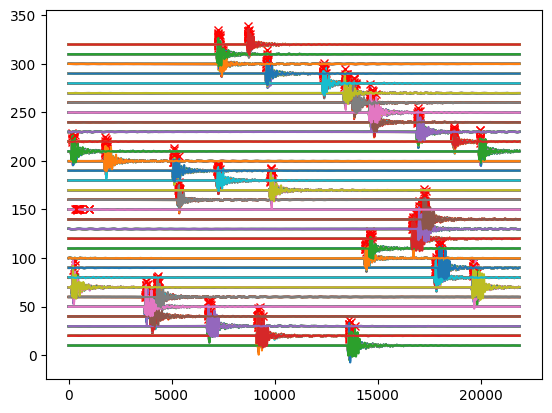

In [29]:
Dts = np.zeros((nphone,n0))
for j in range(nphone):
    for i in range(n0):
        shift = i*10
        y = Mtab[j,i,:]
        plt.plot(y+shift)
        val,imax = get_max(y,prom=0.1)

        plt.plot(imax,val+shift,'rx')
        
        Dts[j,i]=ti[imax]-ti[0]
print(Dts)

In [30]:
Dts.shape

(22, 32)

In [31]:
Dts[1,:]-Dts[0,:]

array([-1.2000e-03, -2.5100e-02, -1.1000e-03,  5.0000e-04,  3.0000e-04,
        5.0000e-04,  5.0000e-04, -3.0000e-04, -4.0000e-04,  5.0000e-04,
        3.0000e-04, -1.6000e-03,  6.0000e-04, -1.7000e-03,  6.9500e-02,
       -8.0000e-04,  5.0000e-04, -7.8000e-03, -1.0000e-03,  4.0000e-04,
       -1.9779e+00,  5.0000e-04, -7.8000e-03, -1.2000e-03,  1.0000e-03,
        6.0000e-04, -9.6000e-03, -2.0000e-04, -1.3000e-03, -9.6000e-03,
        2.0000e-04,  8.0000e-04])

[1.36362273 0.92030909 0.68003636 0.40444091 0.37591818 0.43122727
 1.52433182 1.78001818 1.80037273 1.44158182 1.46365455 1.67243182
 1.7055     1.72471818 0.05254545 0.53383636 0.98092727 0.72437727
 0.51183182 0.17958636 1.09806364 1.86967273 1.69511818 1.47997727
 1.46716818 1.38250455 1.34148636 1.23690455 0.96179545 0.74132727
 0.72623182 0.87223182]
(22, 30)
[    0.           183.33333333 -1990.         -1223.33333333
  1573.33333333 -1403.33333333 -1663.33333333 -2196.66666666
 -1343.33333333 -1146.66666666  -520.            43.33333333
   426.66666667   820.          -550.          5256.66666665
  5483.33333332   513.33333333  3189.99999999  -890.
   140.          3549.99999999]
[    0.         13883.3253301   6535.00063758  5003.31112586
  7145.62492406  6015.11891448  6548.66313752  6555.9887804
  6717.3746525   6834.55598816  6964.02182649  7840.94736338
 13949.40699652 14139.95285232  6130.89172414  6788.45506887
  8754.27831912  6767.01476936  7297.13870864  7580.38477474

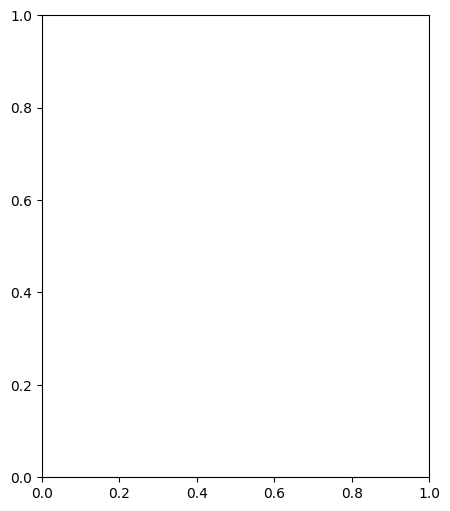

In [37]:
fig, ax = plt.subplots(figsize = (5,6))#,nrows=22,sharex=True)
Dts = np.asarray(Dts)
print(np.mean(Dts,axis=0))
err = np.round(np.std(Dts,axis=0),decimals=9)
good = err<0.05

err_rel = (Dts[:,good]-Dts[0,good])*1000
#print(err_rel*10**3)
print(err_rel.shape)

print(np.mean(err_rel*10**3,axis=1))
print(np.std(err_rel*10**3,axis=1))

In [38]:
err_rel.shape

(22, 30)

In [42]:

i0 = 11
for i0 in range(1,22):
#    print(err_rel[i0,:])
    moy = np.round(np.mean(err_rel[i0,:]),decimals=3)
    interval = np.round(np.std(err_rel[i0,:])/np.sqrt(30-1),decimals=3)
    print(moy,interval)

0.183 2.578
-1.99 1.214
-1.223 0.929
1.573 1.327
-1.403 1.117
-1.663 1.216
-2.197 1.217
-1.343 1.247
-1.147 1.269
-0.52 1.293
0.043 1.456
0.427 2.59
0.82 2.626
-0.55 1.138
5.257 1.261
5.483 1.626
0.513 1.257
3.19 1.355
-0.89 1.408
0.14 1.367
3.55 2.32


(-10.0, 10.0)

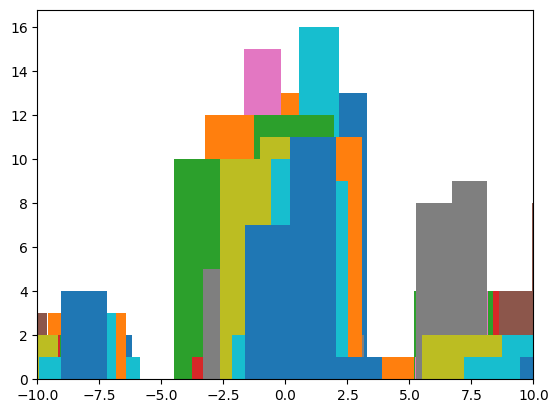

In [55]:
for i0 in range(1,22):
    plt.hist(err_rel[i0,:],30)
plt.xlim([-10,10])

24
24
22
13
20
21
24
24
24
24
21
23
22
22
13
7
16
10
21
21
19


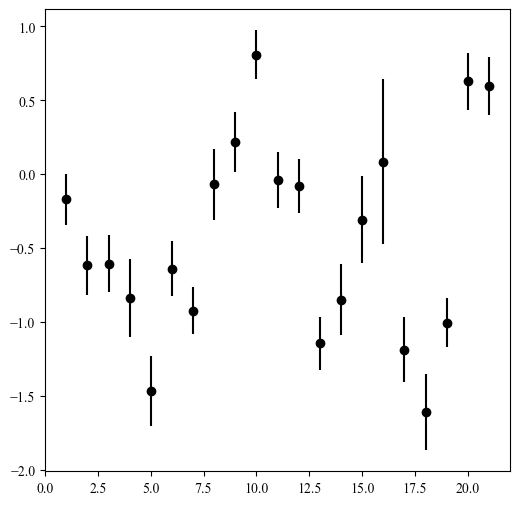

In [94]:
fig, ax = plt.subplots(figsize = (6,6))#,nrows=22,sharex=True)

moys = []
for i0 in range(1,nphone):
    verygood = np.abs(err_rel[i0,:])<5
    nsample = np.sum(verygood)
    print(nsample)
    moy = np.round(np.mean(err_rel[i0,verygood]),decimals=3)
    interval = np.round(np.std(err_rel[i0,verygood])/np.sqrt(nsample-1),decimals=3)
    ax.errorbar(i0,moy,interval,marker='o',color='k')
    
    moys.append(moy)
    
figs = graphes.legende('Phone #','','')

In [59]:
print(np.mean(moys),np.std(moys))

-0.43842857142857145 0.6713515558666904


(array([4., 4., 5., 5., 3.]),
 array([-1.61  , -1.1264, -0.6428, -0.1592,  0.3244,  0.808 ]),
 <BarContainer object of 5 artists>)

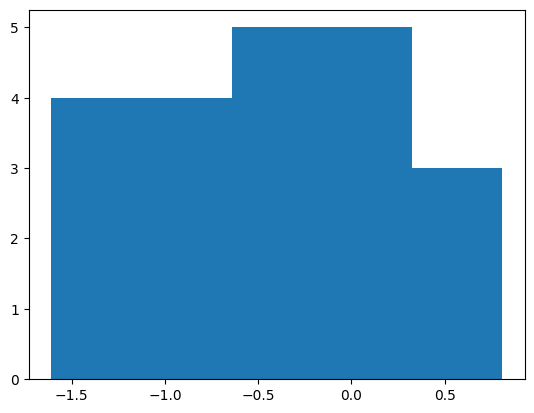

In [61]:
plt.hist(moys,5)

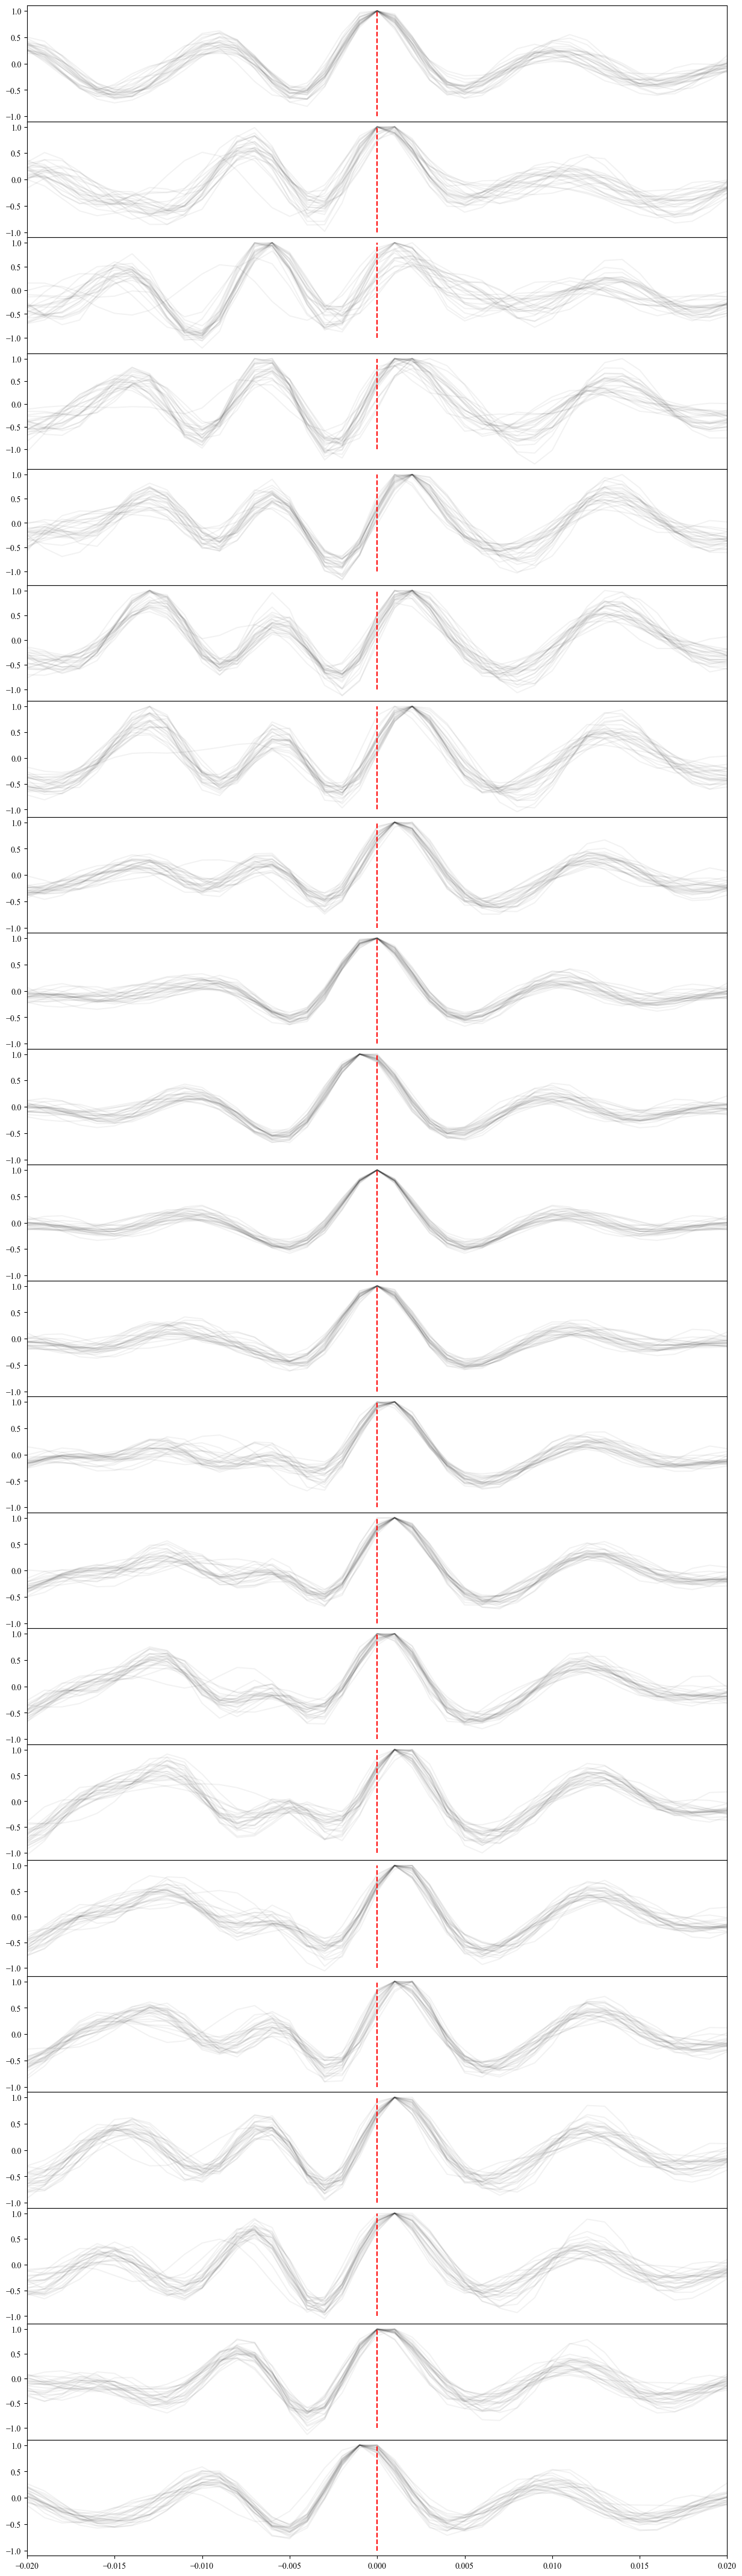

In [158]:
fig, axs = plt.subplots(figsize = (15,2.5*22),nrows=22,sharex=True)

tlag = ti[:int(nt/n0)*2-1]
tlag = tlag-np.mean(tlag)

for j in range(nphone):
    ax = axs[j]
    for i in range(n0):
        yref = Mtab[10,i,:]
        y1 = Mtab[j,i,:]
        yref = yref-np.mean(yref)
        y1 = y1-np.mean(y1)
        C = sig.correlate(yref,y1)#,method='same')
        C = C/np.max(C)
        ax.plot(tlag,C,'k',alpha=0.05)
    ax.plot([0,0],[-1,1],'r--')
    ax.set_xlim(-0.02,0.02)
    
fig.subplots_adjust(hspace=0)

In [8]:
filename = '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/Tsync/tsync_1738419342'



['phone', 'iter', 'tlag', 'dtmedian', 'tmin', 'tmax', 'tstd', 'n', 't0']
['0_0', '0', '0', '1738418902.17872', '0.0017045665000000002', '1738418902.178598', '1738418902.1789145', '8.235415340473988e-05', '50', '1738419211.7666726']
['2_0', '2', '0', '1737121520.0597029', '0.0019856120000000003', '1737121520.059486', '1737121520.0603476', '0.0002442747616601099', '49', '1738419215.6008306']
['3_0', '3', '0', '1737224618.0504465', '0.0015850695', '1737224618.0502918', '1737224618.05061', '8.657121420764143e-05', '50', '1738419216.0741687']
['4_0', '4', '0', '1738326732.6696436', '0.0013847445', '1738326732.6695323', '1738326732.6697898', '6.391023367422995e-05', '50', '1738419216.3749998']
['5_0', '5', '0', '1737224626.3721771', '0.001748416', '1737224626.371911', '1737224626.3723445', '0.00010209110283137354', '50', '1738419216.8343472']
['6_0', '6', '0', '1738325426.5916772', '0.0024526540000000003', '1738325426.5914388', '1738325426.5918677', '0.00011886205646892161', '50', '173841921

In [37]:
base = '/home/turbots/Documents/Bicwin2025'

date = '0201'
phonelist = [58,59,62]

m={}
for phone in phonelist:
    folder = base +f'/Data/{date}/Phone/{phone}/'

    filelist = glob.glob(folder+'accelerometer*')

    datas = []
    coords = ['x','y','z']
    print(phone)
    for i,filename in enumerate(filelist):
        data = rw_data.read_csv(filename)
        dic = rw_data.csv2dict(data)

        Tsync = np.asarray(dic['ta']).astype(float)/10**6+timetable[phone]
        for c in coords:
            dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
        dic['ta']=Tsync
        datas.append(dic)
        print(i,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

    m[phone]=datas

58
0 10.063960387447407 0.530202014467021 0.5681384908236368 0.6505255424201313
1 10.059912209967749 0.5059350894891376 0.4684573913752614 0.7343026593421924
2 10.055798189612768 0.5959808534517915 0.674530496303014 0.9865336962474915
3 10.069785738170554 0.027867157024921596 0.031222801883774326 0.047021598315528955
4 10.038900483351114 0.02675521221039196 0.0264194512943902 0.04564835095937934
5 10.0295872151375 0.010532648518201883 0.028323020496084556 0.038595120864343684
6 8.022010042423162 1.6964267042694803 1.3615335882167026 5.572657196245988
7 9.975412584075002 0.008124667453223586 0.023263685386302253 0.024382439676122893
8 9.974803898887497 0.007848930536925773 0.023158926177292878 0.024379097192035497
9 9.975808902766666 0.007824082000997398 0.02311969598130629 0.024122542665417693
10 9.978191296359723 0.0078334199625825 0.023297048074617625 0.024082138543997
11 9.980082592910552 0.007949710111002343 0.022816097569316365 0.0258798629398286
12 9.981387557430555 0.00786673438

23 9.860315361154166 0.007177817557347706 0.0072589027681530735 0.023020729548349366
24 9.850123633030556 0.007244856999058836 0.00729501129414547 0.023497059613032504
25 9.84904962100833 0.007212476694686322 0.007342188401166861 0.023176346420547122
26 9.850457485061114 0.00726364184972786 0.008030164008316862 0.023102954044736824
27 9.850529715448612 0.007247891030015424 0.0074017401824706406 0.02310762263272566
28 9.850614797343054 0.007193886594366003 0.00735750287338182 0.02316349771563618
29 9.850947812538891 0.007225591029624856 0.0073658628489180105 0.02323792520999753


In [11]:
m.keys()

dict_keys([58, 59, 62])

In [45]:
54000/3600

15.0

In [ ]:
import icewave.field.time as timest
import icewave.phone.analyse as analyse

phone = 59
datas = m[phone]
fig,axs = plt.subplots(figsize=(20,15),nrows=3,sharex=True)

for i in range(len(datas)):
    print(i)
    dic = datas[i]
    ta = (np.asarray(dic['ta']).astype(float))#time in second, UTC time
    ta = ta-ta[0]+timest.today_time([ta[0]])[0]

    for i,c in enumerate(coords):
        y = dic['a'+c]
        y = y-np.mean(y)
        axs[i].plot(ta,y)
        y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.002,flow=0.0001)
        axs[i].plot(ta,y_wave*10,'k')
    
    print(timest.display_time([ta[0]]))
figs = graphes.legende('','$a_x$','',ax=axs[0])
figs = graphes.legende('','$a_y$','',ax=axs[1])
figs = graphes.legende('$t$ (s)','$a_z$','',ax=axs[2])
fig.subplots_adjust(hspace=0)

import icewave.field.multi_instruments as multi

#tmin = multi.convert_time('20:08:00')
#tmax = multi.convert_time('20:13:00')
plt.xlim([tmin,tmax])

ticks = np.linspace(tmin,tmax,6)
axs[2].set_xticks(ticks,display_time(ticks))


0
['09:17:34']
1
['09:32:48']
2
['09:48:02']
3
['10:03:17']
4
['10:18:32']
5
['10:33:48']
6
['10:49:05']
7
['11:04:21']
8
['11:19:39']
9
['11:34:57']
10
['11:50:16']
11
['12:05:33']
12
['12:20:50']
13
['12:36:07']
14
['12:51:24']
15
['13:06:40']
16
['13:21:57']
17
['13:37:14']
18
['13:52:30']
19
['14:07:46']
20
['14:23:03']
21
['14:38:19']
22
['14:53:36']
23
['15:08:53']
24
['15:24:09']
25
['15:39:26']
26
['15:54:43']
27
['16:10:01']
28
['16:25:18']
29
['16:40:37']
30
['16:55:55']
31
['17:11:14']
32
['17:26:33']
33
['17:41:52']
34
['17:57:10']
35
['18:12:29']
36
['18:27:48']
37
['18:43:07']
38
['18:58:26']
39
['19:13:45']


NameError: name 'tmin' is not defined

55.12491281617355

In [241]:
(line[3]-line[-1])

-45030.98925256729

In [223]:
45264457287 / 1e6 / 60 / 24

31.43365089375

In [218]:
46164333993 / 1e6

46164.333993

In [184]:
ts_20230629T064613 = 1688021173

In [187]:
1738532096 - ts_20230629T064613

50510923

In [207]:
ts_20230629T064613 + 53_365_417_168 / 1e6

1688074538.417168

In [204]:
np.ediff1d(np.array(_t[1:], dtype=float)[:, 0])

array([2514., 2514., 2514., ..., 2514., 2513., 2514.])

In [239]:
!ls /home/turbots/Documents/Bicwin2025/Data/0201/Phone

5  58  59  60  61  62  Results	Tsync


In [40]:
#!ls /home/turbots/Documents/Bicwin2025/Data/0201/Phone/62

In [41]:
#!cat /home/turbots/Documents/Bicwin2025/Data/0201/Phone/Tsync/tsync_1738418744

In [79]:
m={}

In [160]:
filelist[0]

'/home/turbots/Documents/Bicwin2025/Data/0201/Phone/62/accelerometer-1-45264457287-46164333993.pkl'

In [165]:
46164333993/10**6

46164.333993

In [162]:
dic['ta'][0]

76408332309.0

In [14]:
dic = rw_data.csv2dict(data)

In [157]:
np.mean(np.diff(dic['ta'][:10]))/1000

2.5525555555555557

76408332.309

In [159]:
dic['ta'][0]/1000/3600/24/365/

SyntaxError: invalid syntax (2517116250.py, line 1)

In [27]:
ta = timest.today_time(dic['ta'])
print(ta[:10])
print(len(ta))

[52131.6138, 54683.6138, 57235.6138, 59788.6138, 62340.6138, 64892.6138, 67445.6138, 69998.6138, 72552.6138, 75104.6138]
360000


In [36]:
dic['ta']/10**6

array([68048.79747461, 68048.80002161, 68048.80256861, ...,
       68965.48664961, 68965.48919561, 68965.49174161])

In [31]:
ta = (np.asarray(dic['ta']).astype(float))
ta = ta-ta[0]+timest.today_time([ta[0]])[0]


In [33]:
print(type(ta[0]))

<class 'numpy.float64'>


22
23


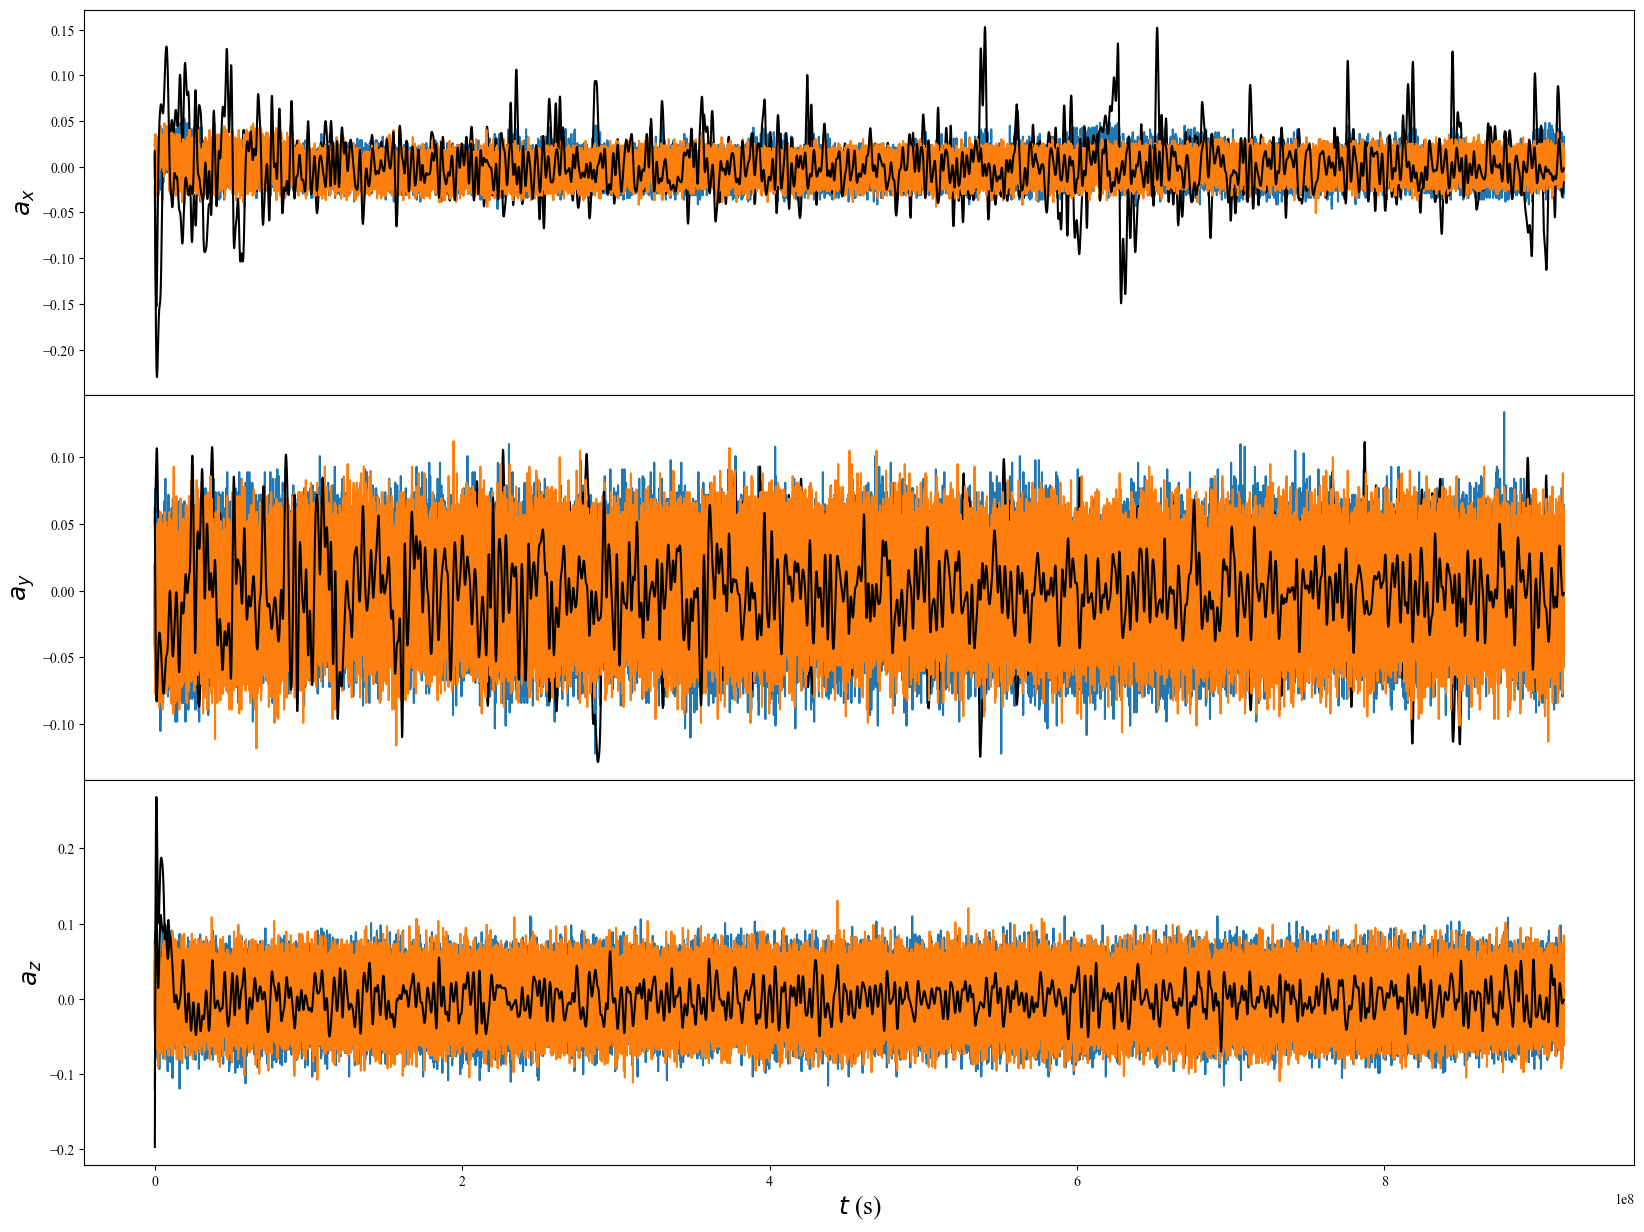

In [132]:
#19h12 UTC
#
line = [58_0,58,0,1738413622.0215788,0.0019006895,1738413622.021405,1738413622.0217085,8.651058798935326e-05,50,1738419220.7759938]

In [138]:
line1 = [0_0,0,0,1738418902.17872,0.0017045665000000002,1738418902.178598,1738418902.1789145,8.235415340473988e-05,50,1738419211.7666726]
print(line1)
line1[3]-line1[-1]

[0, 0, 0, 1738418902.17872, 0.0017045665000000002, 1738418902.178598, 1738418902.1789145, 8.235415340473988e-05, 50, 1738419211.7666726]


-309.58795261383057

In [140]:
Dt = line[-1]-line[3]
print(Dt)

5598.754415035248


In [135]:
import icewave.field.time as timest

t0 = [1738413622.0207553]
timest.display_time(timest.today_time(t0))

line[3]-line[-1]

['07:40:22']

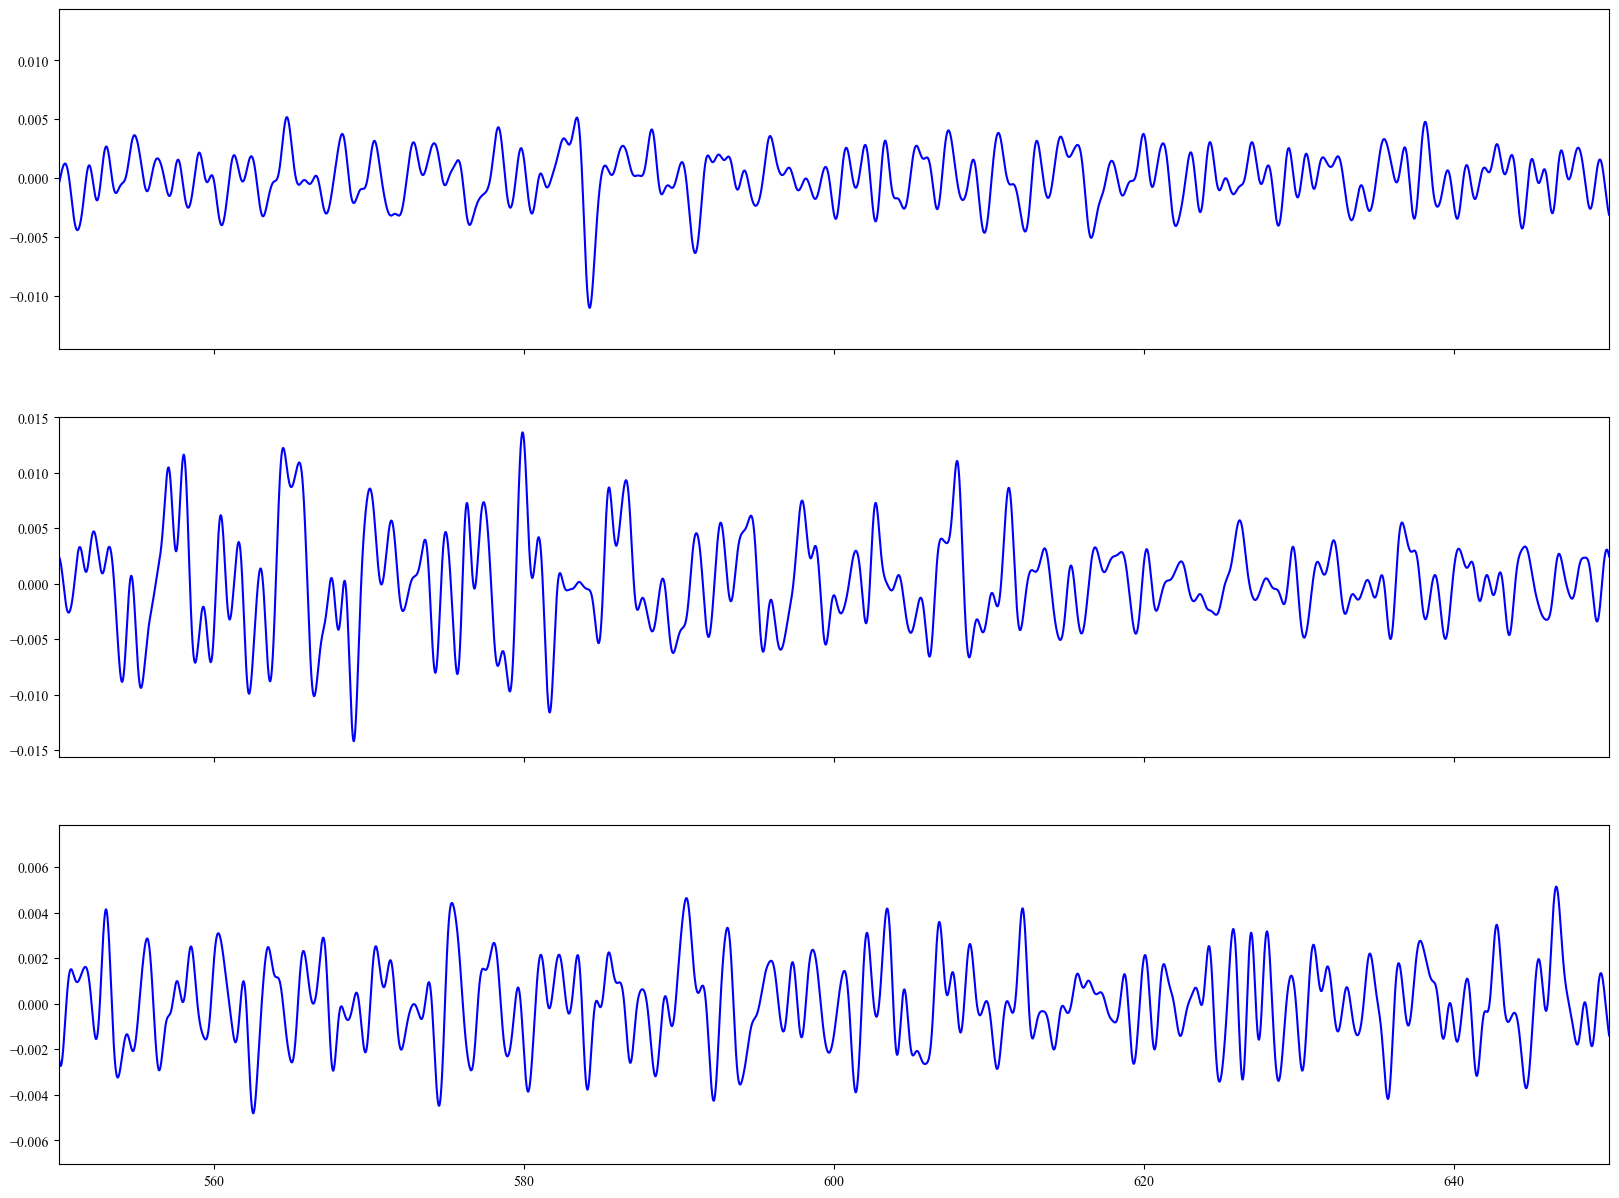

In [123]:
phonelist = [58,59,62]

fig,axs = plt.subplots(figsize=(20,15),nrows=3,sharex=True)


for i,phone in enumerate(phonelist):
    datas = m[phone]
    dic = datas[25]
    ta = np.asarray(dic['ta']).astype(float)
    az = np.asarray(dic['az']).astype(float)
    ax = np.asarray(dic['ax']).astype(float)
    ay = np.asarray(dic['ay']).astype(float)

    t = (ta-ta[0])/10**6
    #plt.plot(t,ax-np.mean(ax),'k-')

    import icewave.phone.analyse as analyse

    y_high,y_wave,y_trend,err = analyse.filtering(ax,fc=0.005,flow=0.0005)

    g=9.81
    axs[i].plot(t,y_wave,'b-')
    #plt.plot(t,y_high,'b-')

    plt.xlim(550,650)

In [124]:
np.std(ax)

0.007212476694686322

In [57]:
analyse.time_spectrum(ta,ax,nt=300)

Number of samples : 1200


(array([0.00000000e+00, 1.43838747e-07, 2.87677494e-07, ...,
        1.93750792e-04, 1.93894631e-04, 1.94038469e-04]),
 array([5.420107  , 5.40387426, 5.33796757, ..., 0.15912128, 0.15571553,
        0.15249032]),
 1.4383874682959443e-06,
 3.449465300488065)

In [36]:

base = '/home/turbots/Documents/Bicwin2025'

date = '0201'
phone = 59
folder = base +f'/Data/{date}/Phone/{phone}/'

filelist = glob.glob(folder+'accelerometer*')
pprint(filelist)

['/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-1-45231831847-46145821871.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-2-46145824409-47059871610.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-3-47059874148-47974560534.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-4-47974563076-48889817696.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-5-48889820239-49805857199.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-6-49805859744-50722506798.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-7-50722509344-51639347871.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-8-51639350418-52556705851.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-9-52556708400-53475309898.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-10-534753124